In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from classes import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

In [2]:
data_handler = handler()

In [4]:
system = Ps_system()    
wavevector = 1
for i in range(1): # change number of pulses
    flip_pulse = {"rabi0" : 2*np.pi*(1000e-3), "detuning": 0,"chirp" : 2*np.pi*(200e-3),"pulse_duration" : 10 ,"unit_wavevector":wavevector,"start":i*20,"end":20*(1+i)}
    #flip_pulse = {"rabi0" : 2*np.pi*(240e-3), "detuning": 2*np.pi*(-153e-3)*wavevector,"chirp" : 0,"pulse_duration" : 10 ,"unit_wavevector":wavevector,"start":i*20,"end":20*(1+i)}
    flip_pulse["label"] = "laser"+str(i)
    system.init_pulse(flip_pulse)
    wavevector = -wavevector
    
print(system.laserDict)

#system.init_distribution_singular()
system.init_MBdistribution()
#system.init_states_desymmetrized()
system.init_states_desymmetrized2()
system.saved_states.append(system.states)
#system.init_pulse_cycle()

#system.set_Hamiltonian_MT(flip_pulse["label"])
#system.set_Hamiltonian_MT2()

system.set_Hamiltonian_MT3()

{'laser0': <classes.laser object at 0x7f0477683f10>}


KeyboardInterrupt: 

In [ ]:
def get_entropy(system,states):
        N_g,N_e,N = system.get_states(states.unit())
        selector_g = N_g > 0
        selector_e = N_e > 0
        selector_t = N > 0
        S_g = k*np.sum(-np.asarray(N_g[selector_g])*np.log(np.asarray(N_g[selector_g]))) # eV/K
        S_e = k*np.sum(-np.asarray(N_e[selector_e])*np.log(np.asarray(N_e[selector_e]))) # eV/K
        S_t = k*np.sum(-np.asarray(N[selector_t])*np.log(np.asarray(N[selector_t]))) # eV/K
        return S_g,S_e,S_t

entropy = np.asarray([get_entropy(system,states) for states in system.saved_states])
pulses_arr = np.arange(51)

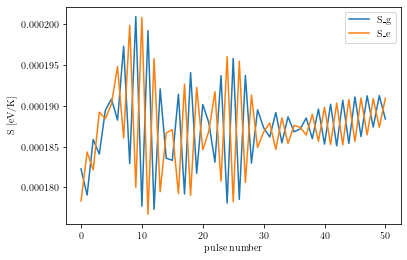

In [74]:
plt.plot(pulses_arr,entropy[:,0],label="S_g")
plt.plot(pulses_arr,entropy[:,1],label="S_e")
#plt.plot(pulses_arr,entropy[:,2],label="pseudo S")
plt.legend()
plt.xlabel("pulse number")
plt.ylabel("S [eV/K]")
#plt.savefig("./figures/nov_2022/entropy_50pulses_3.jpg",bbox_inches="tight")
plt.show()


In [63]:
sigmas = np.zeros(51)
for j in range(51):
    N_g,N_e,N = system.get_states(system.saved_states[j].unit())
    sigmas[j] = np.sqrt(np.sum([p_i*v_i**2 for (p_i,v_i) in [(N[i],system.velocity_bins[i]) for i in range(system.N_bins)] ]))

3.138310772178028e-06


(22.0, 27.0)

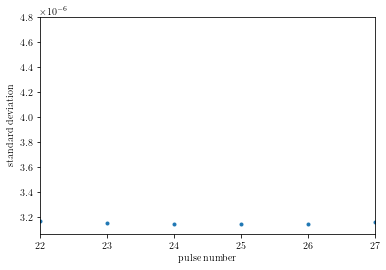

In [70]:
plt.plot(np.arange(51),sigmas,'.')
print(np.min(sigmas))
plt.xlabel("pulse number")
plt.ylabel("standard deviation")
plt.xlim(22,27)
#plt.savefig("./figures/nov_2022/standard_deviation.jpg")

In [100]:
data_handler.save_states(system,"./data/states/R500GHz_D0_C200GHzps_50pulses")

Quantum object: dims = [[250, 2], [250, 2]], shape = (500, 500), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


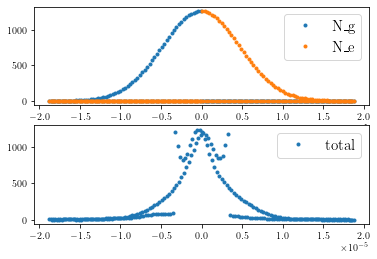

In [73]:
fig, axes = plt.subplots(2)
xaxis = system.velocity_bins
#xaxis_twin = axes[0].twinx()
#

#plt.xlabel("momen cm/ps")
# fig,axes = plt.subplots(5,figsize=(7,35))
# for i in range(5):
#     axes[i].set_title("pulse"+" " + str(i))
#     axes[i].legend()
    #axes[i].set_xlim(-2e-6,2e-6)

N_g,N_e,N = system.get_states(system.saved_states[0])
axes[0].plot(xaxis,N_g,'.',label="N_g")
axes[0].plot(xaxis,N_e,'.',label="N_e")
#axes[0].plot(xaxis,N,'.',label="total")
axes[0].legend(fontsize=15)
#axes[0].set_xlim(-2e-6,2e-6)

N_g,N_e,N = system.get_states(system.saved_states[22])
#axes[1].plot(xaxis,N_g,'.',label="N_g")
#axes[1].plot(xaxis,N_e,'.',label="N_e")
axes[1].plot(xaxis,N,'.',label="total")
axes[1].legend(fontsize=15)
#axes[1].set_xlim(-2e-6,2e-6)

plt.savefig("./figures/nov_2022/pulse22.jpg",bbox_inches="tight")
# excited = system.get_excited()
# ground = system.get_ground()
# fig,ax = system.get_initial_pop_plot()

# ax.plot(system.velocity_bins,ground,'.',color="black",label="ground")
# ax.plot(system.velocity_bins,excited,'.',color="orange",label="excited")
# #ax.legend()
# ax.set_xlim(-2e-6,2e-6)
# #ax.set_ylim(0,100)
# #plt.savefig("figures/cmt/test_MT_2pulses.jpg")
# plt.show()
# print(excited[system.N_bins//2+1],ground[system.N_bins//2+2],system.initial_pop[system.N_bins//2])

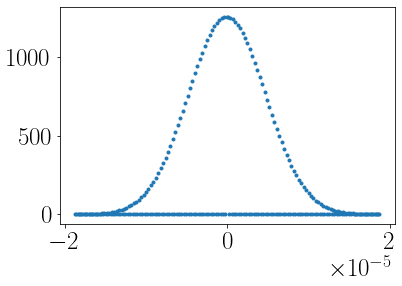

KeyboardInterrupt: 

In [ ]:
N_g,N_e,N = system.get_states(system.saved_states[0])
fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(system.velocity_bins,N,'.')
for states in system.saved_states:
    N_g,N_e,N = system.get_states(states)
    line1.set_ydata(N)
    fig.canvas.draw()
    plt.show(fig)
    fig.canvas.flush_events()
    #time.sleep(1)

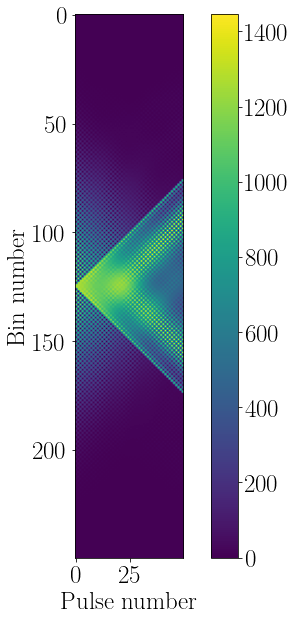

In [ ]:
fig = plt.figure(figsize=(10,10))
X = np.zeros((50,system.N_bins))
for i in range(50):
    N_g,N_e,N = system.get_states(system.saved_states[i])
    X[i] = N
plt.imshow(X.T)
plt.colorbar()
plt.xlabel("Pulse number")
plt.ylabel("Bin number")
#plt.savefig("./figures/cmt/gradient2.jpg",bbox_inches="tight")

Text(0, 0.5, 'number of atoms')

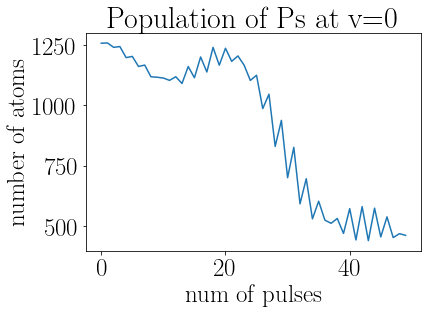

In [ ]:
fig = plt.figure()
#print(np.asarray(system.saved_states).shape)
pops = np.zeros(50)
for i in range(50):
    N_g,N_e,N = system.get_states(system.saved_states[i])
    pops[i] = N[system.N_bins//2]
plt.plot([i for i in range(50)], pops)
plt.title("Population of Ps at v=0")
plt.xlabel("num of pulses")
plt.ylabel("number of atoms")
#plt.savefig("./figures/cmt/pop_at_zero_vel.jpg",bbox_inches="tight")

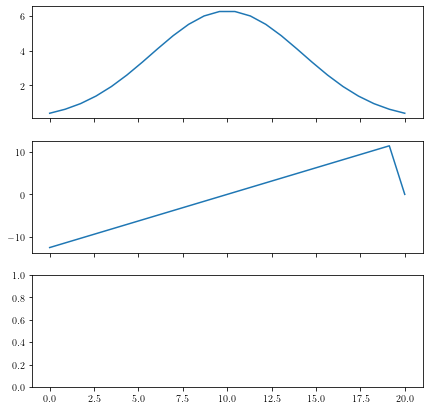

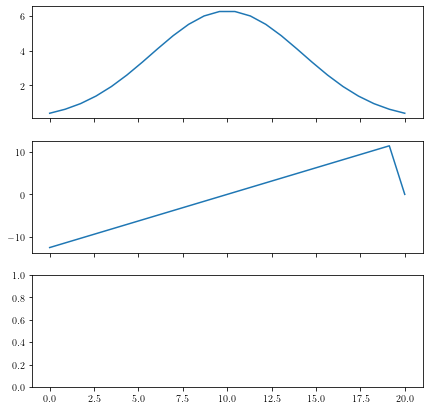

In [ ]:
for laser in system.laserDict:
    laserObj = laser[1]    
    fig,axes = plt.subplots(2,sharex=True,figsize=(7,7))
    axes[0].plot(laserObj.tlist,laserObj.rabi(laserObj.tlist,None))
    #axes[0].set_ylabel(r"$\Omega$ [THz]")
    axes[1].plot(laserObj.tlist,laserObj.chirp(laserObj.tlist,None))
    #axes[1].set_ylabel("r$\alpha$ [THz/ps]")
    #axes[2].plot(laserObj.tlist,laserObj.wavevector)
    #axes[2].set_ylabel("k")
    #axes[2].set_xlabel("time [ps]")
    plt.show()           

KeyError: 0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]
